In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

# Helper libraries
import time
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

COMPETITION_NAME = 'digit-recognizer'

1.13.1


## Load data

### Download files
Download the datasets using the kaggle [api](https://github.com/Kaggle/kaggle-api):

In [2]:
api = KaggleApi()
api.authenticate()
api.competition_download_files(COMPETITION_NAME)

### Load data

In [3]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
train_images = train[...,1:]
train_labels = train[...,0]

test_images = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [4]:
train_labels

array([1., 0., 1., ..., 7., 6., 9.])

## Explore data

In [5]:
train_images.shape

(42000, 784)

In [6]:
len(train_labels)

42000

In [7]:
test_images.shape

(28000, 784)

## Preprocess data
Pixels fall in the range of 0..255. 

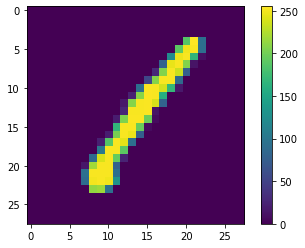

In [8]:
plt.figure()
plt.imshow(np.reshape(train_images[0], (28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

This should be rescaled to a range 0..1 before feeding it into the neural network

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the train set with their class names to verify that the data is correct.

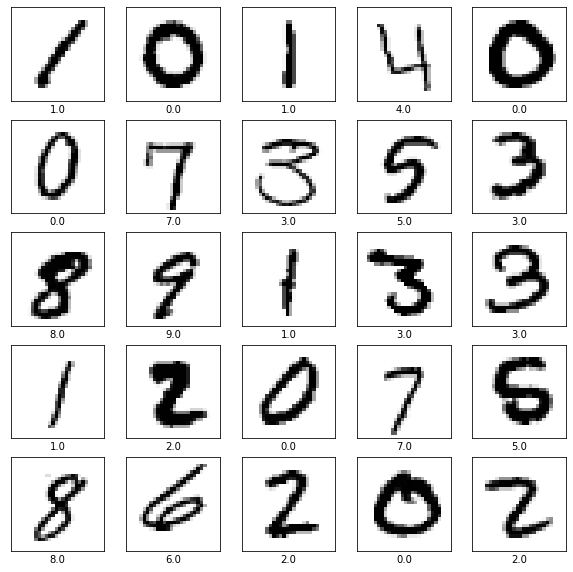

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(train_images[i], (28,28)), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Build model
Now build the model by defining its layers and compiling the model.

### Setup the layers

In [11]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Train
Feed the training data in the model to train it.

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
42000/42000 [==============================] - ETA: 9:04 - loss: 2.3788 - acc: 0.031 - ETA: 43s - loss: 1.9372 - acc: 0.419 - ETA: 25s - loss: 1.5996 - acc: 0.57 - ETA: 19s - loss: 1.3866 - acc: 0.63 - ETA: 16s - loss: 1.2331 - acc: 0.67 - ETA: 15s - loss: 1.1713 - acc: 0.69 - ETA: 15s - loss: 1.1063 - acc: 0.71 - ETA: 14s - loss: 1.0507 - acc: 0.72 - ETA: 13s - loss: 0.9948 - acc: 0.73 - ETA: 13s - loss: 0.9538 - acc: 0.75 - ETA: 12s - loss: 0.8805 - acc: 0.76 - ETA: 11s - loss: 0.8189 - acc: 0.78 - ETA: 10s - loss: 0.7883 - acc: 0.79 - ETA: 9s - loss: 0.7476 - acc: 0.8016 - ETA: 9s - loss: 0.7125 - acc: 0.811 - ETA: 8s - loss: 0.6756 - acc: 0.820 - ETA: 8s - loss: 0.6518 - acc: 0.826 - ETA: 7s - loss: 0.6315 - acc: 0.830 - ETA: 7s - loss: 0.6095 - acc: 0.835 - ETA: 7s - loss: 0.5970 - acc: 0.837 - ETA: 6s - loss: 0.5833 - acc: 0.841 - ETA: 6s - loss: 0.5725 - acc: 0.843 - ETA: 6s - loss: 0.5579 - acc: 0.847 - ETA: 6s - loss: 0.5455 - acc: 0.850 - ETA: 6s - loss: 0.5349 - ac

42000/42000 [==============================] - ETA: 20s - loss: 0.1107 - acc: 1.00 - ETA: 7s - loss: 0.0985 - acc: 0.9818 - ETA: 6s - loss: 0.1242 - acc: 0.970 - ETA: 7s - loss: 0.1498 - acc: 0.961 - ETA: 7s - loss: 0.1502 - acc: 0.960 - ETA: 7s - loss: 0.1433 - acc: 0.961 - ETA: 6s - loss: 0.1484 - acc: 0.957 - ETA: 6s - loss: 0.1441 - acc: 0.959 - ETA: 6s - loss: 0.1454 - acc: 0.959 - ETA: 5s - loss: 0.1509 - acc: 0.956 - ETA: 5s - loss: 0.1484 - acc: 0.956 - ETA: 5s - loss: 0.1493 - acc: 0.955 - ETA: 5s - loss: 0.1500 - acc: 0.954 - ETA: 5s - loss: 0.1519 - acc: 0.953 - ETA: 5s - loss: 0.1524 - acc: 0.953 - ETA: 5s - loss: 0.1519 - acc: 0.954 - ETA: 5s - loss: 0.1501 - acc: 0.954 - ETA: 5s - loss: 0.1513 - acc: 0.953 - ETA: 5s - loss: 0.1500 - acc: 0.954 - ETA: 4s - loss: 0.1482 - acc: 0.955 - ETA: 4s - loss: 0.1469 - acc: 0.955 - ETA: 4s - loss: 0.1458 - acc: 0.956 - ETA: 4s - loss: 0.1446 - acc: 0.956 - ETA: 4s - loss: 0.1442 - acc: 0.956 - ETA: 4s - loss: 0.1429 - acc: 0.957 - ET

42000/42000 [==============================] - ETA: 9s - loss: 0.1978 - acc: 0.937 - ETA: 5s - loss: 0.0784 - acc: 0.983 - ETA: 5s - loss: 0.1047 - acc: 0.972 - ETA: 5s - loss: 0.1091 - acc: 0.968 - ETA: 5s - loss: 0.1097 - acc: 0.967 - ETA: 5s - loss: 0.1067 - acc: 0.968 - ETA: 5s - loss: 0.1052 - acc: 0.968 - ETA: 6s - loss: 0.1098 - acc: 0.968 - ETA: 6s - loss: 0.1104 - acc: 0.968 - ETA: 6s - loss: 0.1059 - acc: 0.970 - ETA: 6s - loss: 0.1013 - acc: 0.972 - ETA: 5s - loss: 0.1020 - acc: 0.971 - ETA: 5s - loss: 0.1003 - acc: 0.970 - ETA: 5s - loss: 0.0999 - acc: 0.970 - ETA: 5s - loss: 0.0988 - acc: 0.970 - ETA: 5s - loss: 0.0970 - acc: 0.971 - ETA: 5s - loss: 0.0942 - acc: 0.972 - ETA: 5s - loss: 0.0929 - acc: 0.972 - ETA: 4s - loss: 0.0933 - acc: 0.972 - ETA: 4s - loss: 0.0940 - acc: 0.972 - ETA: 4s - loss: 0.0953 - acc: 0.972 - ETA: 4s - loss: 0.0961 - acc: 0.972 - ETA: 4s - loss: 0.0954 - acc: 0.972 - ETA: 4s - loss: 0.0953 - acc: 0.972 - ETA: 4s - loss: 0.0955 - acc: 0.972 - ETA

42000/42000 [==============================] - ETA: 11s - loss: 0.1062 - acc: 0.96 - ETA: 6s - loss: 0.0960 - acc: 0.9688 - ETA: 8s - loss: 0.0970 - acc: 0.970 - ETA: 9s - loss: 0.0976 - acc: 0.970 - ETA: 8s - loss: 0.0805 - acc: 0.977 - ETA: 7s - loss: 0.0683 - acc: 0.983 - ETA: 7s - loss: 0.0752 - acc: 0.979 - ETA: 7s - loss: 0.0787 - acc: 0.977 - ETA: 6s - loss: 0.0745 - acc: 0.977 - ETA: 6s - loss: 0.0718 - acc: 0.978 - ETA: 6s - loss: 0.0695 - acc: 0.978 - ETA: 6s - loss: 0.0710 - acc: 0.978 - ETA: 6s - loss: 0.0681 - acc: 0.979 - ETA: 5s - loss: 0.0651 - acc: 0.980 - ETA: 5s - loss: 0.0650 - acc: 0.980 - ETA: 5s - loss: 0.0636 - acc: 0.980 - ETA: 5s - loss: 0.0653 - acc: 0.979 - ETA: 5s - loss: 0.0661 - acc: 0.979 - ETA: 5s - loss: 0.0657 - acc: 0.979 - ETA: 5s - loss: 0.0632 - acc: 0.980 - ETA: 5s - loss: 0.0643 - acc: 0.980 - ETA: 5s - loss: 0.0663 - acc: 0.980 - ETA: 5s - loss: 0.0658 - acc: 0.979 - ETA: 5s - loss: 0.0667 - acc: 0.979 - ETA: 5s - loss: 0.0680 - acc: 0.979 - ET

42000/42000 [==============================] - ETA: 13s - loss: 0.0297 - acc: 1.00 - ETA: 5s - loss: 0.0495 - acc: 0.9844 - ETA: 5s - loss: 0.0427 - acc: 0.988 - ETA: 5s - loss: 0.0496 - acc: 0.986 - ETA: 5s - loss: 0.0535 - acc: 0.985 - ETA: 5s - loss: 0.0551 - acc: 0.985 - ETA: 5s - loss: 0.0539 - acc: 0.986 - ETA: 5s - loss: 0.0533 - acc: 0.986 - ETA: 5s - loss: 0.0549 - acc: 0.985 - ETA: 4s - loss: 0.0552 - acc: 0.985 - ETA: 5s - loss: 0.0536 - acc: 0.985 - ETA: 5s - loss: 0.0536 - acc: 0.985 - ETA: 5s - loss: 0.0525 - acc: 0.985 - ETA: 5s - loss: 0.0529 - acc: 0.985 - ETA: 5s - loss: 0.0535 - acc: 0.984 - ETA: 5s - loss: 0.0537 - acc: 0.984 - ETA: 5s - loss: 0.0519 - acc: 0.985 - ETA: 5s - loss: 0.0523 - acc: 0.985 - ETA: 5s - loss: 0.0557 - acc: 0.984 - ETA: 5s - loss: 0.0547 - acc: 0.985 - ETA: 5s - loss: 0.0547 - acc: 0.984 - ETA: 5s - loss: 0.0550 - acc: 0.984 - ETA: 4s - loss: 0.0549 - acc: 0.984 - ETA: 4s - loss: 0.0534 - acc: 0.985 - ETA: 4s - loss: 0.0528 - acc: 0.985 - ET

## Evaluate
No evaluation data available

## Predict
With the model trained, we can use it to make predictions about some images.

In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([2.3202193e-10, 1.4443293e-11, 9.9999583e-01, 1.0393858e-06,
       2.7067659e-10, 5.6454612e-11, 5.7188950e-12, 3.1261536e-06,
       6.6997063e-10, 4.2828787e-12], dtype=float32)

In [16]:
np.argmax(predictions[0])

2

In [17]:
def plot_image(i, predictions_array, img):
    predictions_array, img = predictions_array[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(np.reshape(img, (28,28)), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue'

    plt.xlabel("{} {:2.0f}%".format(predicted_label,
                                100*np.max(predictions_array)),
                                color=color)

def plot_value_array(i, predictions_array):
    predictions_array = predictions_array[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')

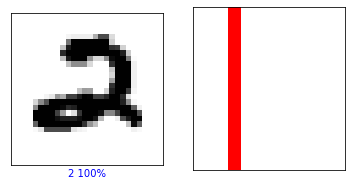

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions)
plt.show()

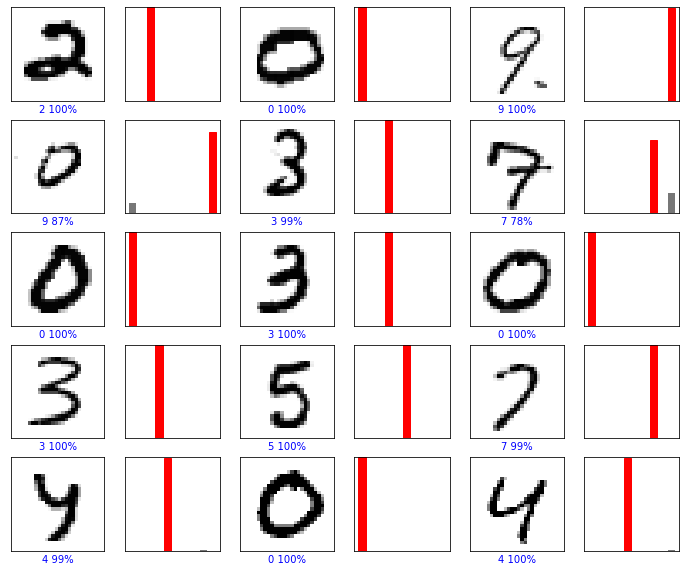

In [19]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions)
plt.show()

## Submit

Finally, make sure that the predictions are saved in a csv file in the correct format

```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

In [20]:
def labels(x):
    return round(np.argmax(x), 0)

predict_labels = np.apply_along_axis(labels, axis=1, arr=predictions)

In [21]:
TIMESTAMP = time.strftime('%Y%m%d-%H%M%S')
FILE_NAME = 'submission-{}.csv'.format(TIMESTAMP)
np.savetxt(FILE_NAME, np.dstack((np.arange(1, len(predict_labels) + 1), predict_labels))[0],
           fmt='%1.0f', delimiter=',', header='ImageId,Label', comments='')
print(FILE_NAME)

submission-20190625-113157.csv


In [22]:
api.competition_submit(FILE_NAME, 'Submission {}'.format(TIMESTAMP), COMPETITION_NAME)

100%|███████████████████████████████████████████████████████████████████████████████| 235k/235k [00:03<00:00, 66.9kB/s]


Successfully submitted to Digit Recognizer